In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [6]:
from ucimlrepo import fetch_ucirepo  # Importer la fonction fetch_ucirepo pour récupérer des ensembles de données depuis UCI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Récupérer l'ensemble de données "Heart Disease" avec l'ID 45 depuis UCI
heart_disease = fetch_ucirepo(id=45)

# Les données sont récupérées sous forme de DataFrames pandas
X = heart_disease.data.features  # Les caractéristiques sont stockées dans X
y = heart_disease.data.targets    # La cible (présence ou absence de maladie cardiaque) est stockée dans y

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train.values.ravel())  # Convert DataFrame to NumPy array and then use .ravel()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities

# Évaluation du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba, multi_class="ovr")}')  # Specify 'ovr' for one-vs-rest
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))  # Set undefined metrics to 0


Accuracy: 0.4918032786885246
ROC AUC Score: 0.7444890204596583
[[28  0  1  0  0]
 [ 6  1  3  2  0]
 [ 4  2  1  2  0]
 [ 1  5  1  0  0]
 [ 0  2  1  1  0]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



## Confusion Matrix
The confusion matrix is a table used to visualize the performance of a classification model. It shows the number of correct and incorrect predictions for each class.

### Structure of the Confusion Matrix:
#### Rows (Y-Axis): 
Represent the actual classes (true labels). 
#### Columns (X-Axis):
Represent the predicted classes (labels predicted by the model).


Each cell in the matrix displays the number of times samples from the actual class (row) were classified as the predicted class (column). Here’s what each element in the matrix represents:

#### True Positive (TP): 
Samples correctly classified as belonging to the positive class.
#### False Positive (FP):
Samples incorrectly classified as belonging to the positive class.
#### True Negative (TN): 
Samples correctly classified as not belonging to the positive class.
#### False Negative (FN): 
Samples incorrectly classified as not belonging to the positive class.
### Interpretation:
#### Main Diagonal: 
Cells along the main diagonal show correct predictions. Higher values here indicate better performance.
#### Off-Diagonal: 
Values outside the main diagonal indicate misclassifications. Ideally, these values should be low.
## ROC Curve (Receiver Operating Characteristic)
The ROC curve is a graph that shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds.

### Components of the ROC Curve:
#### X-Axis (False Positive Rate - FPR): 
Indicates the proportion of negative samples incorrectly classified as positive.
#### Y-Axis (True Positive Rate - TPR): 
Indicates the proportion of positive samples correctly classified as positive.
#### Curve: 
Represents the model's performance at different decision thresholds. A curve that rises sharply towards the top left corner indicates a good model.
#### Diagonal Line (k--):
Represents the performance of a random model (no skill). A ROC curve above this line is better than random guessing.
### Interpretation:
Area Under the Curve (AUC): The area under the ROC curve (AUC) quantifies the model's ability to discriminate between classes. An AUC of 1 means perfect separation, while an AUC of 0.5 indicates no better discrimination than random chance.
## Summary of Schemes:
#### Confusion Matrix:
Shows where the model makes mistakes and where it succeeds for each class. Used to evaluate specific errors and adjust class predictions.
#### ROC Curve: 
Assesses the overall performance of the model at different thresholds and compares the discriminatory abilities of multiple models.

Accuracy: 0.4918032786885246
ROC AUC Score: 0.7444890204596583
[[28  0  1  0  0]
 [ 6  1  3  2  0]
 [ 4  2  1  2  0]
 [ 1  5  1  0  0]
 [ 0  2  1  1  0]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



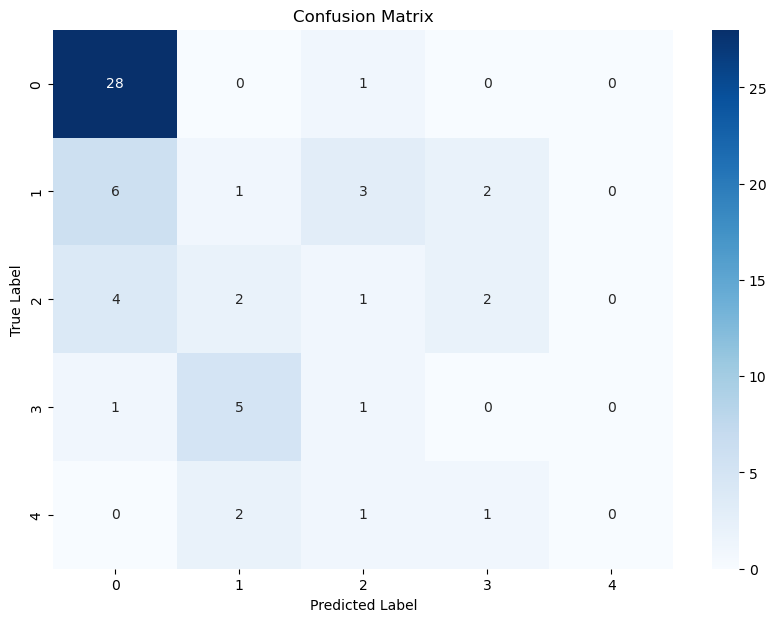

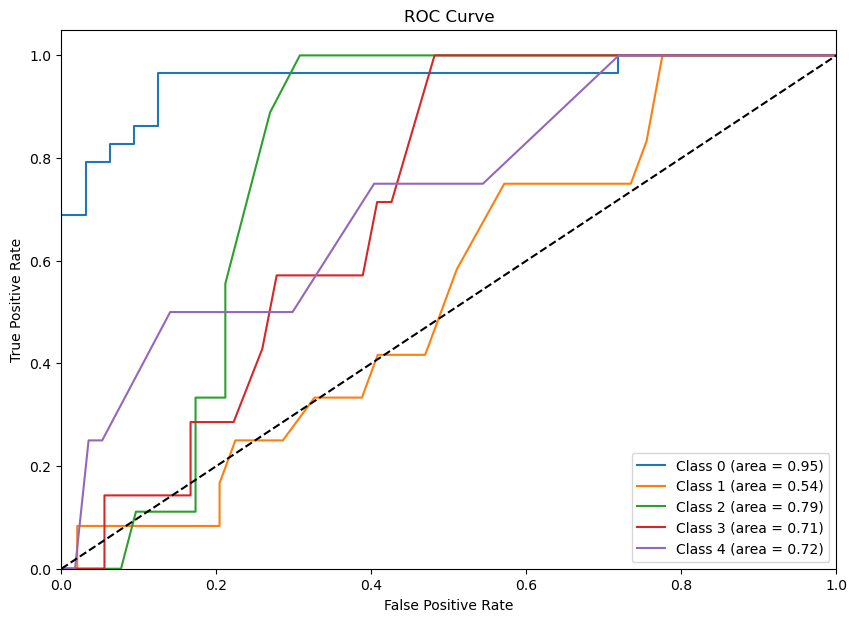

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import numpy as np

# Récupérer l'ensemble de données "Heart Disease" avec l'ID 45 depuis UCI
heart_disease = fetch_ucirepo(id=45)

# Les données sont récupérées sous forme de DataFrames pandas
X = heart_disease.data.features  # Les caractéristiques sont stockées dans X
y = heart_disease.data.targets    # La cible (présence ou absence de maladie cardiaque) est stockée dans y

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train.values.ravel())  # Convert DataFrame to NumPy array and then use .ravel()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Affichage des résultats
print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print(conf_matrix)
print(class_report)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(conf_matrix.shape[1]), 
            yticklabels=np.arange(conf_matrix.shape[0]))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualisation des courbes ROC
plt.figure(figsize=(10, 7))
n_classes = len(np.unique(y))  # Ensure number of classes is correctly determined
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average=None)[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
